<a href="https://colab.research.google.com/github/SantiagoGomezfpv/hyperparameter/blob/main/Clasificadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Técnicas tradicionales clasificadores**

In [ ]:
!pip install optuna scikit-learn xgboost matplotlib seaborn

In [ ]:
import optuna
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data[:, :2]  # Usamos solo las primeras dos características para visualización 2D
y = iris.target

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Random Forest + Optuna**

In [ ]:
def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 16)

    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )

    scores = cross_val_score(clf, X_train, y_train, cv=3)
    return scores.mean()

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50)
print('Best parameters for Random Forest: ', study_rf.best_params)

[I 2024-05-25 14:26:14,428] A new study created in memory with name: no-name-117f70f7-414c-4423-b943-573e1697e6b5
[I 2024-05-25 14:26:15,037] Trial 0 finished with value: 0.9500000000000001 and parameters: {'n_estimators': 68, 'max_depth': 22, 'min_samples_split': 6}. Best is trial 0 with value: 0.9500000000000001.
[I 2024-05-25 14:26:15,659] Trial 1 finished with value: 0.9583333333333334 and parameters: {'n_estimators': 82, 'max_depth': 16, 'min_samples_split': 2}. Best is trial 1 with value: 0.9583333333333334.
[I 2024-05-25 14:26:16,675] Trial 2 finished with value: 0.9500000000000001 and parameters: {'n_estimators': 114, 'max_depth': 18, 'min_samples_split': 15}. Best is trial 1 with value: 0.9583333333333334.
[I 2024-05-25 14:26:16,995] Trial 3 finished with value: 0.9500000000000001 and parameters: {'n_estimators': 85, 'max_depth': 10, 'min_samples_split': 13}. Best is trial 1 with value: 0.9583333333333334.
[I 2024-05-25 14:26:17,158] Trial 4 finished with value: 0.958333333333

Best parameters for Random Forest:  {'n_estimators': 82, 'max_depth': 16, 'min_samples_split': 2}


## **K-nn + Optuna**

In [ ]:
def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 20)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])

    clf = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights
    )

    scores = cross_val_score(clf, X_train, y_train, cv=3)
    return scores.mean()

study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=50)
print('Best parameters for K-NN: ', study_knn.best_params)

[I 2024-05-25 14:26:40,295] A new study created in memory with name: no-name-60749763-5c8b-4cd9-8c8e-f9bc60a29106
[I 2024-05-25 14:26:40,313] Trial 0 finished with value: 0.9416666666666668 and parameters: {'n_neighbors': 13, 'weights': 'uniform'}. Best is trial 0 with value: 0.9416666666666668.
[I 2024-05-25 14:26:40,327] Trial 1 finished with value: 0.9333333333333335 and parameters: {'n_neighbors': 5, 'weights': 'uniform'}. Best is trial 0 with value: 0.9416666666666668.
[I 2024-05-25 14:26:40,342] Trial 2 finished with value: 0.9500000000000001 and parameters: {'n_neighbors': 3, 'weights': 'uniform'}. Best is trial 2 with value: 0.9500000000000001.
[I 2024-05-25 14:26:40,359] Trial 3 finished with value: 0.9333333333333335 and parameters: {'n_neighbors': 7, 'weights': 'uniform'}. Best is trial 2 with value: 0.9500000000000001.
[I 2024-05-25 14:26:40,373] Trial 4 finished with value: 0.9333333333333335 and parameters: {'n_neighbors': 5, 'weights': 'uniform'}. Best is trial 2 with va

Best parameters for K-NN:  {'n_neighbors': 3, 'weights': 'distance'}


## **SVM + Optuna**

(Support Vector Machines - Máquinas de vectores de soporte)

In [ ]:
def objective_svm(trial):
    C = trial.suggest_loguniform('C', 1e-3, 1e3)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    clf = SVC( C=C, kernel=kernel, gamma='auto')

    scores = cross_val_score(clf, X_train, y_train, cv=3)
    return scores.mean()

study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=50)
print('Best parameters for SVM: ', study_svm.best_params)

[I 2024-05-25 14:26:51,897] A new study created in memory with name: no-name-7cdea61d-efbe-420a-a368-6d97e43473c6
<ipython-input-6-5096a08181ec>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e3)
[I 2024-05-25 14:26:51,909] Trial 0 finished with value: 0.9500000000000001 and parameters: {'C': 0.005214127898450649, 'kernel': 'poly'}. Best is trial 0 with value: 0.9500000000000001.
<ipython-input-6-5096a08181ec>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e3)
[I 2024-05-25 14:26:51,917] Trial 1 finished with value: 0.9666666666666667 and parameters: {'C': 0.007176350307591225, 'kernel

Best parameters for SVM:  {'C': 0.007176350307591225, 'kernel': 'poly'}


## **XGBoost + Optuna**

In [ ]:
def objective_xgb(trial):
    param = {
        'verbosity': 0,
        'objective': 'multi:softmax',
        'num_class': 3,
        'booster': 'gbtree',
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'eta': trial.suggest_loguniform('eta', 1e-8, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide'])
    }

    dtrain = xgb.DMatrix(X_train, label=y_train)
    cv_results = xgb.cv(param, dtrain, num_boost_round=100, nfold=3, early_stopping_rounds=10, metrics='mlogloss')
    return cv_results['test-mlogloss-mean'].values[-1]

study_xgb = optuna.create_study(direction='minimize')
study_xgb.optimize(objective_xgb, n_trials=50)
print('Best parameters for XGBoost: ', study_xgb.best_params)


[I 2024-05-25 14:27:06,378] A new study created in memory with name: no-name-f4f81031-3317-4c62-a723-ef703e263f21
<ipython-input-7-89806bfdd30a>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': trial.suggest_loguniform('eta', 1e-8, 1.0),
<ipython-input-7-89806bfdd30a>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
[I 2024-05-25 14:27:06,586] Trial 0 finished with value: 0.6351298585534096 and parameters: {'max_depth': 4, 'eta': 0.0059922718939033484, 'gamma': 0.00020387478623852743, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.6351298585534096.
[I 2024-05-25 14:27:08,009] Trial 1 finished with

Best parameters for XGBoost:  {'max_depth': 3, 'eta': 0.4767798603661508, 'gamma': 0.6182227429516444, 'grow_policy': 'lossguide'}


# **Entrenar y Evaluar los Modelos con los Mejores Parámetros**

In [ ]:
# Random Forest
best_rf = RandomForestClassifier(**study_rf.best_params)
best_rf.fit(X_train, y_train)
print("Random Forest Accuracy: ", best_rf.score(X_test, y_test))

# K-NN
best_knn = KNeighborsClassifier(**study_knn.best_params)
best_knn.fit(X_train, y_train)
print("K-NN Accuracy: ", best_knn.score(X_test, y_test))

# SVM
best_svm = SVC(**study_svm.best_params)
best_svm.fit(X_train, y_train)
print("SVM Accuracy: ", best_svm.score(X_test, y_test))

# XGBoost
best_xgb = xgb.XGBClassifier(**study_xgb.best_params)
best_xgb.fit(X_train, y_train)
print("XGBoost Accuracy: ", best_xgb.score(X_test, y_test))

Random Forest Accuracy:  1.0
K-NN Accuracy:  1.0
SVM Accuracy:  0.9666666666666667
XGBoost Accuracy:  1.0


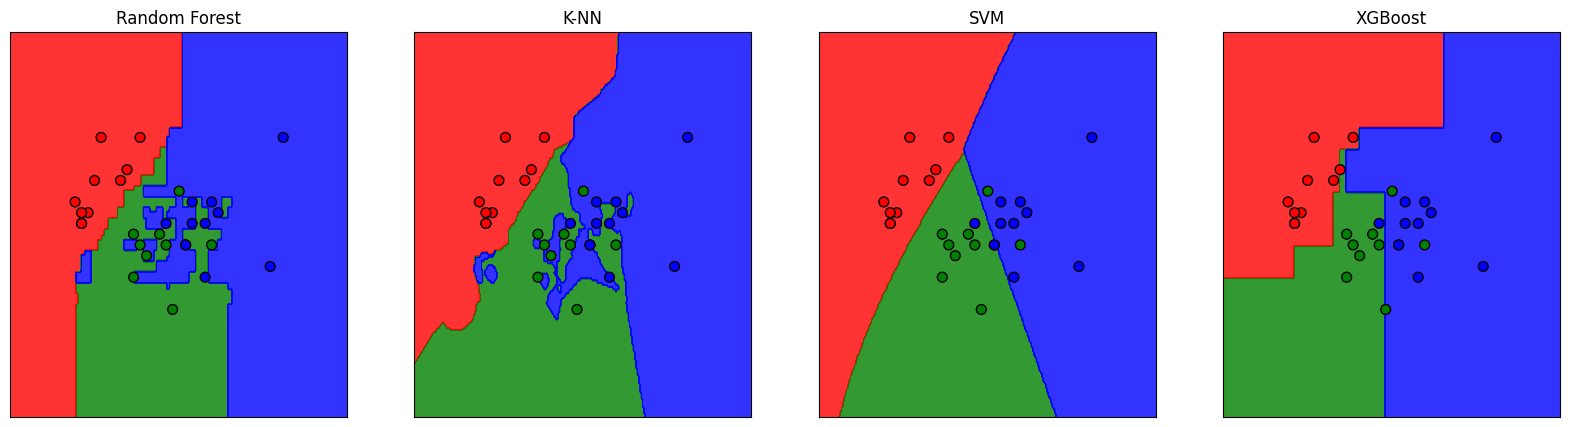

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, y, model, ax, title):
    h = .02  # Tamaño de paso en la malla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('#FF0000', 'green', '#0000FF')))
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, cmap=ListedColormap(('#FF0000', 'green', '#0000FF')))
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

# Entrenar los modelos con los mejores parámetros
best_rf.fit(X_train, y_train)
best_knn.fit(X_train, y_train)
best_svm.fit(X_train, y_train)
best_xgb.fit(X_train, y_train)

# Crear el gráfico
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
plot_decision_boundaries(X_test, y_test, best_rf, axes[0], "Random Forest")
plot_decision_boundaries(X_test, y_test, best_knn, axes[1], "K-NN")
plot_decision_boundaries(X_test, y_test, best_svm, axes[2], "SVM")
plot_decision_boundaries(X_test, y_test, best_xgb, axes[3], "XGBoost")
plt.show()

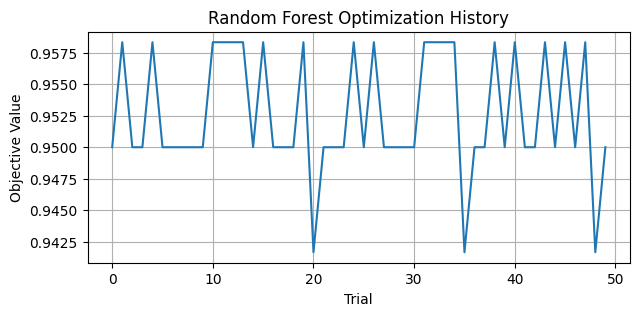

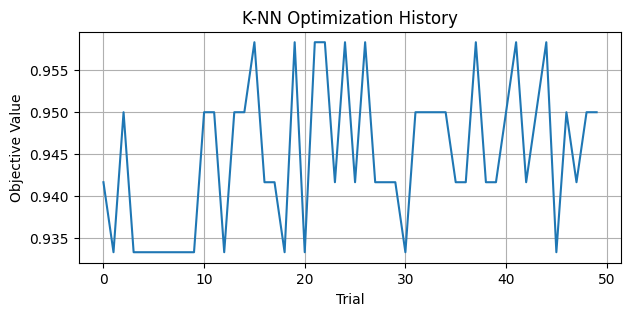

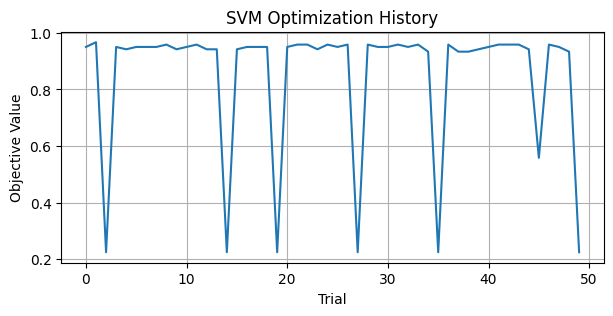

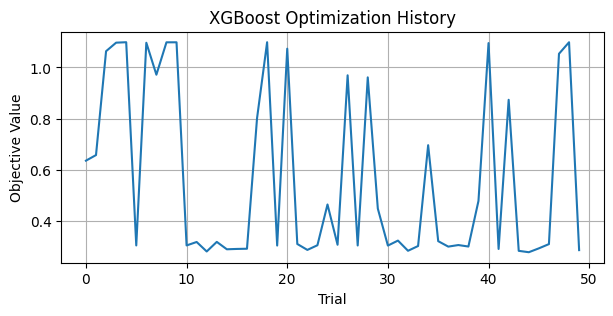

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Función para graficar el historial de optimización de Optuna
def plot_optimization_history(study, title):
    fig = plt.figure(figsize=(7, 3))
    plt.plot([t.number for t in study.trials], [t.value for t in study.trials])
    plt.xlabel('Trial')
    plt.ylabel('Objective Value')
    plt.title(title)
    plt.grid()
    plt.show()

# Graficar el historial de optimización de cada modelo
plot_optimization_history(study_rf, 'Random Forest Optimization History')
plot_optimization_history(study_knn, 'K-NN Optimization History')
plot_optimization_history(study_svm, 'SVM Optimization History')
plot_optimization_history(study_xgb, 'XGBoost Optimization History')